In [1]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
df.head()
#전처리한 값들을 확인해볼 수 있다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
#일부 컬럼만 사용할 것임. - Insulin 전처리하기 전의 값이므로 제거
#Pregnancies_high사용할 것이기 때문에 Pregnancies 제거, Outcome 제거
#Age나누지 않고 그냥 사용하는 것이 정확도가 더 좋았어서 그냥 Age만 사용
#Insulin_log제거
#지난 실습에서 스코어가 잘 나온 피처들만 사용, X에 넣어줌. 9개로 줄어들음.
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
from sklearn.model_selection import train_test_split
#사이킷런에서 제공하는 model_selection의 train_test_split기능으로 train, test set으로 나눌 수 있다.
#20% test set
# X : feature, y : label
#random_state를 지정하지 않으면 매번 샘플링할 때마다 다른 train set으로 나눈다.
# -> 어떠한 파라미터를 변경해서 스코어가 올라간건지 랜덤하게 올라간건지 알 수 없음
#random_state를 지정함으로써 항상 동일한 출력을 내도록 한다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [9]:
#제대로 실행되었는지 확인하기 위해
#train 세트의 문제와 정답의 데이터 수 확인
X_train.shape, y_train.shape

((614, 9), (614,))

In [10]:
#test 세트의 문제와 정답의 데이터 수 확인
X_test.shape, y_test.shape

((154, 9), (154,))

## 학습과 예측하기 - Decision Tree

In [11]:
#Decision Tree를 불러온다.
from sklearn.tree import DecisionTreeClassifier #Classification 문제이기 때문에 

model = DecisionTreeClassifier(max_depth = 5, random_state=42)
model

DecisionTreeClassifier(max_depth=5, random_state=42)

In [12]:
#3개 5개 11개
#11개는 오버피팅
#하나씩 넣어서 확인하기 번거로움.
#for문 사용하여 max_depth에 따른 스코어 출력
#최적의 파라미터 찾기.

## 최적의 max_depth 찾기

In [13]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [14]:
#4일 때 가장 좋은 성능을 낸다. 87%
#다른 파라미터를 변경해도 성능이 향상될 수 있습니다.

## Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 42)
param_grid = {"max_depth": range(3,12), "max_features" : [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid = param_grid, n_jobs = -1, cv = 5, verbose = 1)
clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [29]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   11.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [32]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [30]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [33]:
clf.best_score_

0.8664934026389444

In [35]:
clf.cv_results_ #cv결과를 반환해준다.

{'mean_fit_time': array([0.01636481, 0.02034402, 0.01701417, 0.01395984, 0.01077075,
        0.01156793, 0.01795111, 0.01336551, 0.0157578 , 0.03869505,
        0.01596079, 0.0365027 , 0.02612977, 0.02613039, 0.01914997,
        0.02653136, 0.0179481 , 0.02353368, 0.02852769, 0.01854339,
        0.03113184, 0.02353597, 0.02194161, 0.02393551, 0.02034683,
        0.03111744, 0.02892113, 0.03151488, 0.02752519, 0.01735468,
        0.01655855, 0.016153  , 0.01595807, 0.01475887, 0.0251369 ,
        0.01815033, 0.01156907, 0.01495786, 0.01515851, 0.01057081,
        0.01216803, 0.01296277, 0.01336303, 0.01356597, 0.01236997]),
 'std_fit_time': array([0.00233463, 0.00319156, 0.00775611, 0.00315581, 0.00074456,
        0.00048656, 0.00950285, 0.0013536 , 0.00369956, 0.00980042,
        0.00274913, 0.02166518, 0.01520616, 0.01305533, 0.0054045 ,
        0.01291848, 0.00516318, 0.00626492, 0.01182309, 0.00905775,
        0.02669414, 0.00814098, 0.00962665, 0.00903046, 0.00610321,
        0.022

In [41]:
pd.DataFrame(clf.cv_results_) #dataframe 형태로 출력

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016365,0.002335,0.011768,0.003362,3,0.3,"{'max_depth': 3, 'max_features': 0.3}",0.747967,0.845528,0.764228,0.772358,0.852459,0.796508,0.043623,34
1,0.020344,0.003192,0.009777,0.001463,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.780488,0.910569,0.813008,0.853659,0.918033,0.855151,0.053625,9
2,0.017014,0.007756,0.013644,0.010617,3,0.7,"{'max_depth': 3, 'max_features': 0.7}",0.780488,0.902439,0.804878,0.788618,0.844262,0.824137,0.044887,29
3,0.013960,0.003156,0.009176,0.004902,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.788618,0.902439,0.804878,0.813008,0.819672,0.825723,0.039736,28
4,0.010771,0.000745,0.005985,0.000002,3,1,"{'max_depth': 3, 'max_features': 1}",0.691057,0.642276,0.699187,0.723577,0.647541,0.680728,0.031188,45
5,0.011568,0.000487,0.008579,0.004263,4,0.3,"{'max_depth': 4, 'max_features': 0.3}",0.821138,0.894309,0.756098,0.813008,0.836066,0.824124,0.044336,30
6,0.017951,0.009503,0.019947,0.019193,4,0.5,"{'max_depth': 4, 'max_features': 0.5}",0.788618,0.886179,0.804878,0.878049,0.918033,0.855151,0.049790,9
7,0.013366,0.001354,0.006581,0.001019,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.015758,0.003700,0.022740,0.021469,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
9,0.038695,0.009800,0.025534,0.023741,4,1,"{'max_depth': 4, 'max_features': 1}",0.723577,0.747967,0.715447,0.707317,0.704918,0.719845,0.015517,42


In [39]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score') #점수가 높은 순으로 나온다. 각 split 결과를 평균낸 것이 mean_Test_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.026130,0.015206,0.007580,0.002862,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.013366,0.001354,0.006581,0.001019,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.015758,0.003700,0.022740,0.021469,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.028528,0.011823,0.016553,0.007813,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.031515,0.020051,0.011371,0.004398,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5
17,0.023534,0.006265,0.013365,0.008936,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.861789,0.869919,0.804878,0.894309,0.860656,0.858310,0.029337,5
31,0.016153,0.004480,0.008380,0.003000,9,0.5,"{'max_depth': 9, 'max_features': 0.5}",0.853659,0.902439,0.780488,0.861789,0.885246,0.856724,0.041834,7
11,0.036503,0.021665,0.011370,0.009369,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",0.837398,0.878049,0.821138,0.878049,0.868852,0.856697,0.023222,8
1,0.020344,0.003192,0.009777,0.001463,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.780488,0.910569,0.813008,0.853659,0.918033,0.855151,0.053625,9
6,0.017951,0.009503,0.019947,0.019193,4,0.5,"{'max_depth': 4, 'max_features': 0.5}",0.788618,0.886179,0.804878,0.878049,0.918033,0.855151,0.049790,9


In [40]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.026130,0.015206,0.007580,0.002862,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.013366,0.001354,0.006581,0.001019,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.015758,0.003700,0.022740,0.021469,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.028528,0.011823,0.016553,0.007813,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.031515,0.020051,0.011371,0.004398,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [42]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [45]:
clf.predict(X_test)
clf.score(X_test,y_test) #test에 예측을 해보니 더 좋은 정확도가 나왔다.

0.8701298701298701

In [ ]:
#여러개의 하이퍼파라미터를 지정할 수 있다.

## RandomSearchCV

In [203]:
model

DecisionTreeClassifier(random_state=42)

In [204]:
max_depth = np.random.randint(3,20,10) #3부터 20의 값에서 랜덤으로 10개 출력
max_depth

array([ 6,  3,  5, 13, 19, 19, 13,  3, 12,  8])

In [205]:
max_features = np.random.uniform(0.4, 1.0, 100) #0.4에서 1.0까지 랜덤으로 100개

In [206]:
param_distributions = {'max_depth':max_depth, 'max_features':max_features,
                       'min_samples_split': list(range(2,7))}

In [207]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                         param_distributions,
                         n_iter=100,
                         scoring="accuracy",
                         n_jobs=-1,
                         cv=5,
                         random_state=42)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 6,  3,  5, 13, 19, 19, 13,  3, 12,  8]),
                                        'max_features': array([0.40151262, 0.88724177, 0.73386769, 0.85067767, 0.67165014,
       0.63782772, 0.78041014, 0.44047382, 0.60533078, 0.86259956,
       0.44925173, 0.54888135, 0.62194315, 0.71704462, 0.93442118,
       0...
       0.83411503, 0.84881882, 0.68662718, 0.70558661, 0.76633098,
       0.78208083, 0.84796608, 0.98406936, 0.63927701, 0.54153442,
       0.78089514, 0.94695757, 0.41166354, 0.78111191, 0.67312726,
       0.86958376, 0.69539216, 0.92698208, 0.45987058, 0.99868095,
       0.72573416, 0.61275082, 0.55298243, 0.80253983, 0.55505997,
       0.98452904, 0.78364077, 0.69397948, 0.42862974, 0.5869541 ]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_st

In [208]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.740431095716676, 'max_depth': 8}

In [209]:
clf.best_score_

0.8697321071571371

In [210]:
clf.score(X_test, y_test)

0.8766233766233766

In [211]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,0.012963,0.001996,0.005193,3.968807e-04,4,0.740431,8,"{'min_samples_split': 4, 'max_features': 0.740...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
18,0.017750,0.005513,0.009980,7.976367e-03,6,0.969095,13,"{'min_samples_split': 6, 'max_features': 0.969...",0.829268,0.894309,0.829268,0.878049,0.901639,0.866507,0.031349,2
60,0.012365,0.001353,0.005986,6.305258e-04,4,0.782081,19,"{'min_samples_split': 4, 'max_features': 0.782...",0.910569,0.886179,0.788618,0.845528,0.901639,0.866507,0.044877,2
62,0.016955,0.009524,0.006183,3.997419e-04,4,0.686837,12,"{'min_samples_split': 4, 'max_features': 0.686...",0.845528,0.853659,0.813008,0.886179,0.926230,0.864921,0.038493,4
73,0.012166,0.000400,0.005588,4.872051e-04,3,0.901523,6,"{'min_samples_split': 3, 'max_features': 0.901...",0.861789,0.894309,0.813008,0.878049,0.877049,0.864841,0.027885,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.017952,0.012017,0.009971,7.486001e-03,2,0.781112,3,"{'min_samples_split': 2, 'max_features': 0.781...",0.780488,0.902439,0.804878,0.813008,0.803279,0.820818,0.042217,95
20,0.011370,0.000797,0.005984,8.341244e-07,3,0.869584,3,"{'min_samples_split': 3, 'max_features': 0.869...",0.780488,0.902439,0.804878,0.813008,0.803279,0.820818,0.042217,95
44,0.018150,0.011377,0.006584,1.196577e-03,5,0.88746,3,"{'min_samples_split': 5, 'max_features': 0.887...",0.780488,0.902439,0.804878,0.813008,0.803279,0.820818,0.042217,95
23,0.015755,0.007606,0.007981,4.041733e-03,4,0.884334,3,"{'min_samples_split': 4, 'max_features': 0.884...",0.780488,0.902439,0.804878,0.813008,0.803279,0.820818,0.042217,95


In [ ]:
# 더 좋은 스코어 찾으려면 범위를 조정해가면서 실행해보면 찾을 수 있을 것이다.
#훨씬 더 여러 개의 값을 랜덤하게 테스트해볼 수 있다.
#다양한 머신러닝 알고리즘을 제공하고 있음. 다른 알고리즘을 사용하면 더 좋은 성능이 나올 수 있음. 다음영상.

## 학습과 예측하기

In [15]:
#학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [16]:
feature_names = X_train.columns.tolist()

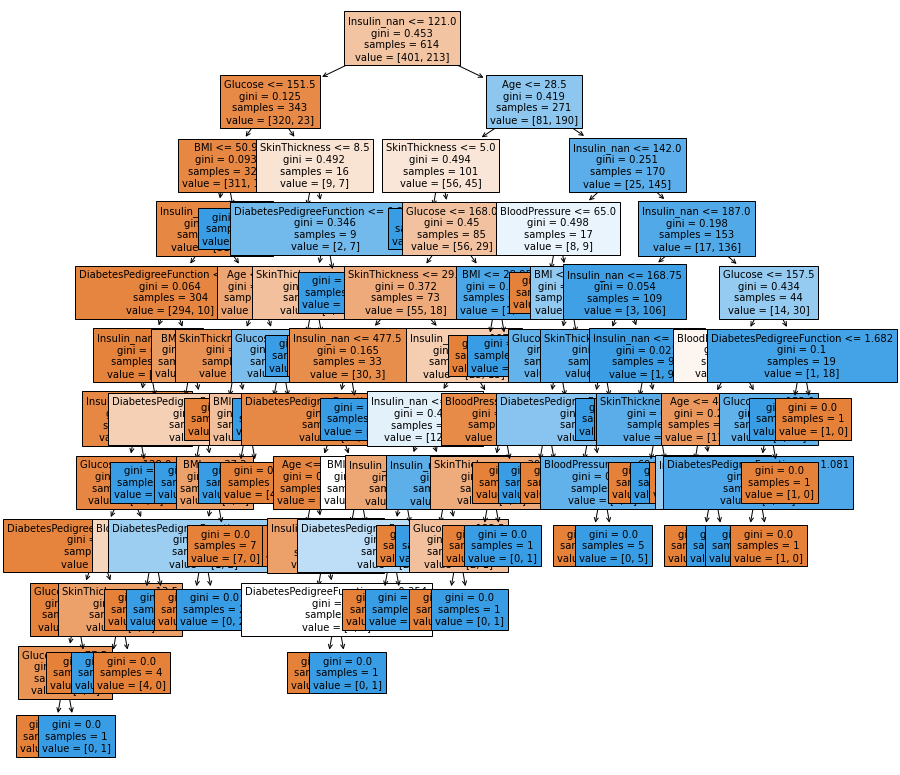

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14,14))
tree = plot_tree(model, feature_names = feature_names , fontsize=10, filled = True)

#Insulin_nan이 상단에 위치
#gini가 0이되면 트리 만들기를 멈춤
#샘플의 개수가 1이면 value가 True or False (0,1)으로 나눠진다.
#샘플의 개수가 밑으로 갈수록 점점 줄어든다.
#샘플의 개수가 줄어든 것을 그대로 학습한 것으로 예측하면 1개 2개의 샘플로 학습한 것을 일반화하게 된다.
#그러면 오버피팅 현상이 일어나게 된다.
#학원에서 100점 맞았는데 학교에서는 90점 맞는 현상. 학원시험에 일반화되어 있다. 학교시험에 적응 못하고 오버피팅.
#DecisionTree 옵션을 지정해주는 것만으로도 성능이 좋아진다.

In [18]:
#현재 트리의 깊이는 11, max_depth옵션은 트리의 깊이를 의미한다.
#트리의 깊이(max_depth)값을 조정하기만 해도 성능이 좋아진다.
#너무 적게 트리의 깊이를 설정하면 언더피팅 현상이 일어난다.

In [19]:
#예측을 하고 결과를 y_predict에 담는다.
y_predict = model.predict(X_test) #정답은 담지 않는다.
y_predict
#0 당뇨병이 발병하지 않은 케이스, 1은 발병한 케이스

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

## 정확도(Accuracy) 측정하기

In [20]:
y_predict - y_test
#정답값과 예측값이 다른 경우에는 1또는 -1로 나온다.

668    0
324    0
624    0
690    0
473    0
      ..
355    0
534    1
344    0
296   -1
462    0
Name: Outcome, Length: 154, dtype: int64

In [21]:
#다르게 예측한 개수를 구해서 diff_count에 할당
#다 더하기 위해 절대값을 씌어줌.
#이전 실습과 train, test set을 나눠주는 방식이 바뀌었다.
#다시 실행하면 바뀜
#예측할 때마다 Decision Tree가 다른 나무를 그린다. 
#지난 실습에는 Decision Tree에 random_state를 지정해줬음.
#다시 실행하면 동일하게 28개로 나옴.
#예측할 때마다 같은 값이 나오게 하기 위해서는 random_state를 지정해주면 됨.
diff_count = abs(y_predict - y_test).sum()
diff_count

28

In [22]:
 
# 다르게 예측한 갯수를 구해서 diff_count 에 넣습니다.

# 28개가 틀렸다고 나오는데 데이터를 랜덤하게 섞었으므로 지난번보다 더 많이 틀렸다고 생각해볼 수 있습니다.

# 모델링을 할 때마다 diff_count가 달라지는데,
# 동일 조건에서 동일 accuracy가 나오게 하고 싶다면 모델에서 random_state를 같은 숫자로 지정해줍니다.
 

In [23]:
#accurcy score를 구한다.
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test, y_predict) * 100

#이전 영상에서는 90%까지 정확도가 나왔다.
#데이터를 랜덤으로 섞어서 예측하니 81%가 나옴.
#지난 모델에서는 오버피팅이 발생한 것으로 예상할 수 있다.
#이전 실습에서는 위에서 80%, 아래에서 20% 나눠준 것.
#이번 실습에서는 섞어서 나눠줌.
#예측 결과가 차이가 많이 난다.

81.81818181818183

In [24]:
# accuracy_score?

In [25]:
#지난 실습에서는 피처 엔지니어링을 통해 정확도를 끌어 올렸다.
#이번에는 DecisionTree의 파라미터 값을 조정을 하여 정확도를 끌어 올릴 것이다. 

In [26]:
print(diff_count)
accuracy_score(y_test, y_predict) * 100

28


81.81818181818183